<a href="https://colab.research.google.com/github/pradhumnpatel/-Social_Media_Sentiment_Analysis/blob/main/Social_Media_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from nltk.corpus import stopwords
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.stem import LancasterStemmer
from string import punctuation
from nltk.tokenize import word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import nltk
nltk.download()
nltk.download('stopwords')

from nltk.corpus import stopwords

set(stopwords.words("english"))


NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> l
Packages:
  [ ] abc................. Australian Broadcasting Commission 2006
  [ ] alpino.............. Alpino Dutch Treebank
  [ ] averaged_perceptron_tagger Averaged Perceptron Tagger
  [ ] averaged_perceptron_tagger_ru Averaged Perceptron Tagger (Russian)
  [ ] basque_grammars..... Grammars for Basque
  [ ] bcp47............... BCP-47 Language Tags
  [ ] biocreative_ppi..... BioCreAtIvE (Critical Assessment of Information
                           Extraction Systems in Biology)
  [ ] bllip_wsj_no_aux.... BLLIP Parser: WSJ Model
  [ ] book_grammars....... Grammars from NLTK Book
  [ ] brown............... Brown Corpus
  [ ] brown_tei........... Brown Corpus (TEI XML Version)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [ ]:
test=pd.read_csv('/content/test.csv', encoding='ISO-8859-1')
train=pd.read_csv('/content/train.csv',encoding='ISO-8859-1')

In [ ]:
df=pd.concat([test,train])

In [ ]:
df.head()

,textID,text,sentiment,Time of Tweet,Age of User,Country,Population -2020,Land Area (Km²),Density (P/Km²),selected_text
0,f87dea47db,Last session of the day http://twitpic.com/67ezh,neutral,morning,0-20,Afghanistan,38928346.0,652860.0,60.0,NaN
1,96d74cb729,Shanghai is also really exciting (precisely -...,positive,noon,21-30,Albania,2877797.0,27400.0,105.0,NaN
2,eee518ae67,"Recession hit Veronique Branquinho, she has to...",negative,night,31-45,Algeria,43851044.0,2381740.0,18.0,NaN
3,01082688c6,happy bday!,positive,morning,46-60,Andorra,77265.0,470.0,164.0,NaN
4,33987a8ee5,http://twitpic.com/4w75p - I like it!!,positive,noon,60-70,Angola,32866272.0,1246700.0,26.0,NaN


In [ ]:
df.shape

(32296, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32296 entries, 0 to 27480
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   textID            31015 non-null  object 
 1   text              31014 non-null  object 
 2   sentiment         31015 non-null  object 
 3   Time of Tweet     31015 non-null  object 
 4   Age of User       31015 non-null  object 
 5   Country           31015 non-null  object 
 6   Population -2020  31015 non-null  float64
 7   Land Area (Km²)   31015 non-null  float64
 8   Density (P/Km²)   31015 non-null  float64
 9   selected_text     27480 non-null  object 
dtypes: float64(3), object(7)
memory usage: 2.7+ MB


In [ ]:
df['text']

0        Last session of the day  http://twitpic.com/67ezh
1         Shanghai is also really exciting (precisely -...
2        Recession hit Veronique Branquinho, she has to...
3                                              happy bday!
4                   http://twitpic.com/4w75p - I like it!!
                               ...                        
27476     wish we could come see u on Denver  husband l...
27477     I`ve wondered about rake to.  The client has ...
27478     Yay good for both of you. Enjoy the break - y...
27479                           But it was worth it  ****.
27480       All this flirting going on - The ATG smiles...
Name: text, Length: 32296, dtype: object

In [ ]:
def remove_unnecessary_characters(text):
    text = re.sub('<.*?>', '', str(text))
    text = re.sub('[^a-zA-Z0-9\s]', '', str(text))
    text = re.sub('\s+', ' ', str(text)).strip()
    return text
df['clean_text'] = df['text'].apply(remove_unnecessary_characters)

In [ ]:
def tokenize_text(text):
    try:
        text = str(text)
        tokens = word_tokenize(text)
        return tokens
    except Exception as e:
        print(f"Error tokenizing text: {e}")
        return []
df['tokens'] = df['text'].apply(tokenize_text)

Streaming output truncated to the last 5000 lines.
Error tokenizing text: name 'word_tokenize' is not defined
Error tokenizing text: name 'word_tokenize' is not defined
Error tokenizing text: name 'word_tokenize' is not defined
Error tokenizing text: name 'word_tokenize' is not defined
Error tokenizing text: name 'word_tokenize' is not defined
Error tokenizing text: name 'word_tokenize' is not defined
Error tokenizing text: name 'word_tokenize' is not defined
Error tokenizing text: name 'word_tokenize' is not defined
Error tokenizing text: name 'word_tokenize' is not defined
Error tokenizing text: name 'word_tokenize' is not defined
Error tokenizing text: name 'word_tokenize' is not defined
Error tokenizing text: name 'word_tokenize' is not defined
Error tokenizing text: name 'word_tokenize' is not defined
Error tokenizing text: name 'word_tokenize' is not defined
Error tokenizing text: name 'word_tokenize' is not defined
Error tokenizing text: name 'word_tokenize' is not defined
Error

In [ ]:
def normalize_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r'[^\w\s]', '', text)
        text = re.sub(r'\s+', ' ', text).strip()
    else:
        text = str(text)
    return text
df['normalized_text'] = df['text'].apply(normalize_text)

In [ ]:
df['normalized_text'].head()

0                    id have responded if i were going
1           sooo sad i will miss you here in san diego
2                               my boss is bullying me
3                        what interview leave me alone
4    sons of why couldnt they put them on the relea...
Name: normalized_text, dtype: object

In [ ]:
def remove_stopwords(text):
    if isinstance(text, str):
        words = text.split()
        filtered_words = [word for word in words if word.lower() not in stopwords.words('english')]
        filtered_text = ' '.join(filtered_words)
    else:
        filtered_text = ''
    return filtered_text
df['text_without_stopwords'] = df['text'].apply(remove_stopwords)

In [ ]:
df['text_without_stopwords'].head()

0                               I`d responded, going
1                         Sooo SAD miss San Diego!!!
2                                boss bullying me...
3                             interview! leave alone
4    Sons ****, couldn`t put releases already bought
Name: text_without_stopwords, dtype: object

In [ ]:
df.dropna(inplace=True)

<Axes: xlabel='sentiment'>

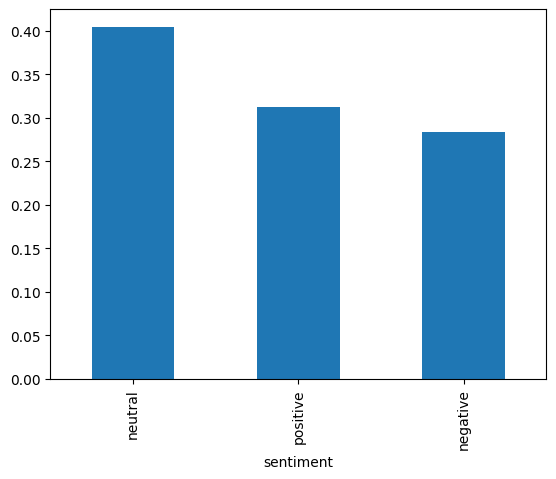

In [ ]:
df['sentiment'].value_counts(normalize=True).plot(kind='bar')

In [ ]:
df['sentiment'].value_counts()


sentiment
neutral     11117
positive     8582
negative     7781
Name: count, dtype: int64

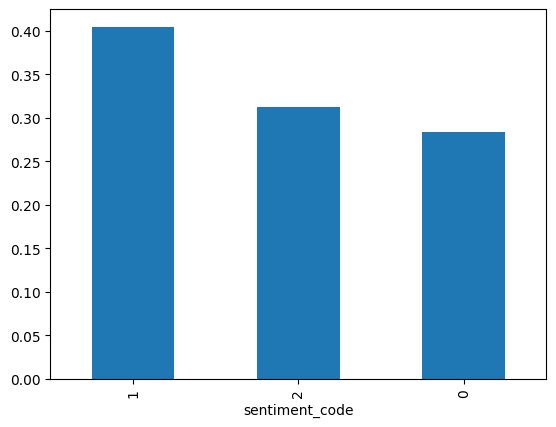

In [ ]:
df['sentiment_code'] = df['sentiment'].astype('category').cat.codes
sentiment_distribution = df['sentiment_code'].value_counts(normalize=True)
sentiment_distribution.plot(kind='bar')
plt.show()

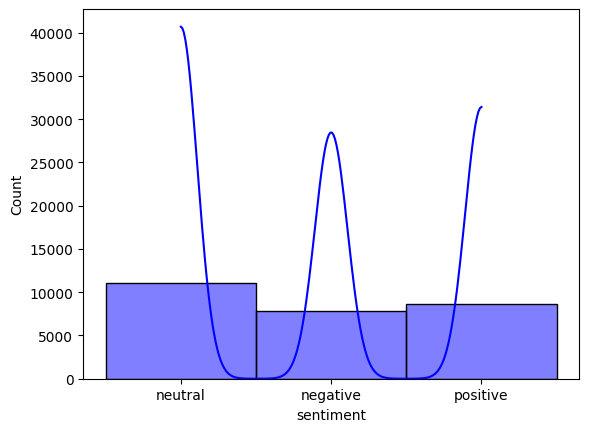

In [ ]:
sns.histplot(df['sentiment'], kde=True, color = 'b')
plt.show()

In [ ]:
data_eda = pd.DataFrame()
data_eda['text'] = final_corpus
data_eda['sentiment'] = df['sentiment'].values
data_eda.head()

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative


In [ ]:
stuff_to_be_removed = list(stopwords.words('english'))+list(punctuation)
stemmer = LancasterStemmer()
corpus = df['text'].tolist()
print(len(corpus))
print(corpus[0])

27480
 I`d have responded, if I were going


In [ ]:
import nltk
nltk.download('punkt')

def tokenize(token):
    return nltk.word_tokenize(token);
tokenize("why is this not working?");

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


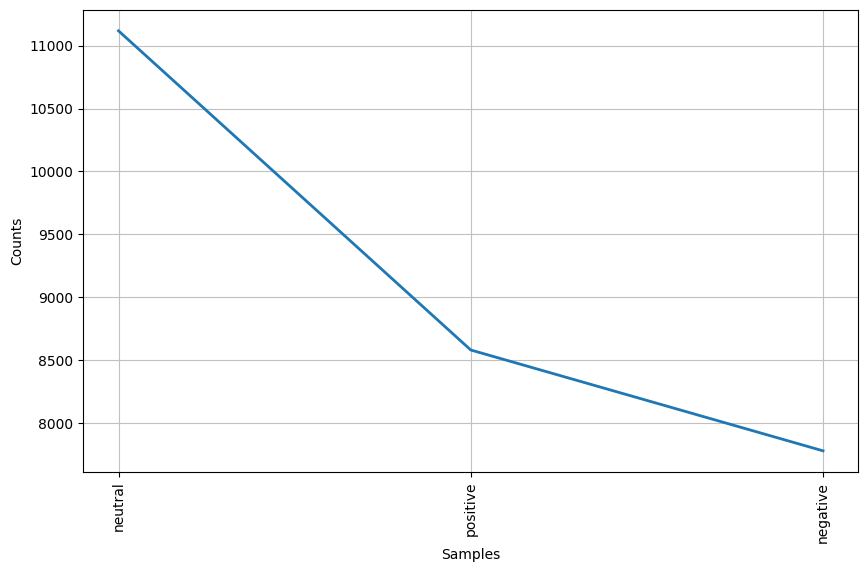

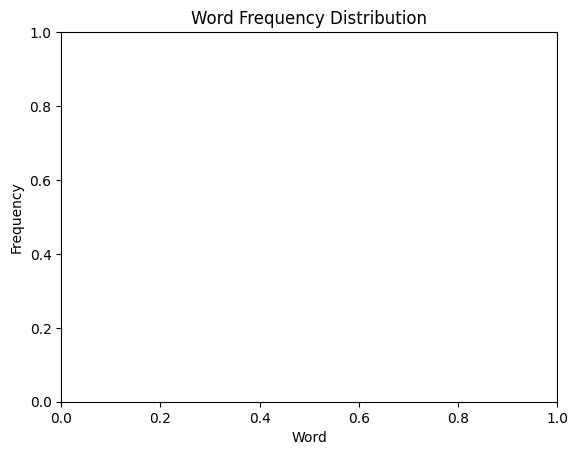

In [ ]:
from nltk.probability import FreqDist

word_freq = FreqDist(word_tokenize(' '.join(df['sentiment'])))
plt.figure(figsize=(10, 6))
word_freq.plot(20, cumulative=False)
plt.title('Word Frequency Distribution')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()

In [ ]:
final_corpus = df['text'].astype(str).tolist()
data_eda = pd.DataFrame()
data_eda['text'] = final_corpus
data_eda['sentiment'] = df["sentiment"].values
data_eda.head()

,text,sentiment
0,"I`d have responded, if I were going",neutral
1,Sooo SAD I will miss you here in San Diego!!!,negative
2,my boss is bullying me...,negative
3,what interview! leave me alone,negative
4,"Sons of ****, why couldn`t they put them on t...",negative


In [ ]:
df['Time of Tweet'] = df['Time of Tweet'].astype('category').cat.codes
df['Country'] = df['Country'].astype('category').cat.codes
df['Age of User']=df['Age of User'].replace({'0-20':18,'21-30':25,'31-45':38,'46-60':53,'60-70':65,'70-100':80})


In [ ]:
df=df.drop(columns=['textID','Time of Tweet', 'Age of User', 'Country', 'Population -2020', 'Land Area (Km²)', 'Density (P/Km²)'])

In [ ]:
import string

def wp(text):
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

df['selected_text'] = df["selected_text"].apply(wp)

In [ ]:
X=df['selected_text']
Y= df['sentiment']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorization = TfidfVectorizer()
XV_train = vectorization.fit_transform(X_train)
XV_test = vectorization.transform(X_test)

In [ ]:
score_baseline = df['sentiment'].value_counts(normalize=True).max()
score_baseline

0.40454876273653567

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(n_jobs=-1)
lr.fit(XV_train,Y_train)

LogisticRegression(n_jobs=-1)

In [ ]:
pred_lr=lr.predict(XV_test)

In [ ]:
from sklearn.metrics import accuracy_score,classification_report, ConfusionMatrixDisplay
score_lr = accuracy_score(Y_test, pred_lr)
score_lr

0.8349708879184862

In [ ]:
print(classification_report(Y_test, pred_lr))

              precision    recall  f1-score   support

    negative       0.83      0.77      0.80      1523
     neutral       0.80      0.90      0.84      2275
    positive       0.90      0.81      0.85      1698

    accuracy                           0.83      5496
   macro avg       0.84      0.83      0.83      5496
weighted avg       0.84      0.83      0.83      5496



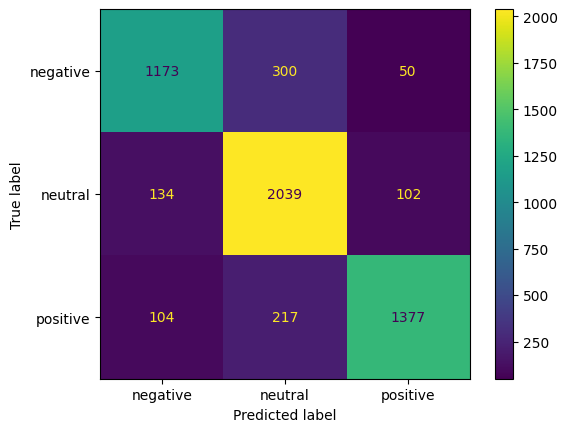

In [ ]:
ConfusionMatrixDisplay.from_predictions(Y_test, pred_lr)

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(XV_train, Y_train)

DecisionTreeClassifier()

In [ ]:
pred_dt = dt.predict(XV_test)

In [ ]:
score_dt = dt.score(XV_test, Y_test)
score_dt

0.7634643377001455

In [ ]:
print(classification_report(Y_test, pred_dt))

              precision    recall  f1-score   support

    negative       0.71      0.74      0.73      1523
     neutral       0.76      0.78      0.77      2275
    positive       0.82      0.77      0.79      1698

    accuracy                           0.76      5496
   macro avg       0.76      0.76      0.76      5496
weighted avg       0.77      0.76      0.76      5496



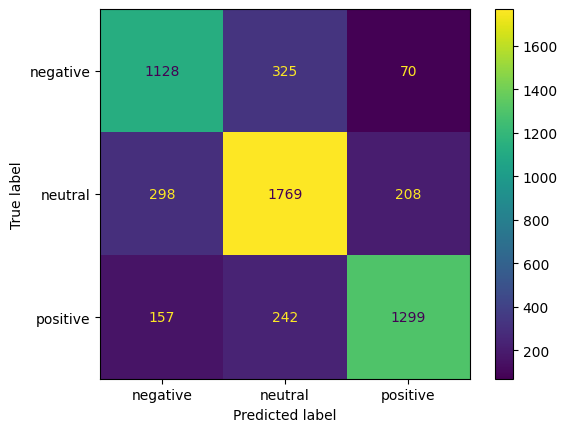

In [ ]:
ConfusionMatrixDisplay.from_predictions(Y_test, pred_dt)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(random_state=0)
rfc.fit(XV_train, Y_train)

RandomForestClassifier(random_state=0)

In [ ]:
pred_rfc = rfc.predict(XV_test)

In [ ]:
score_rfc = rfc.score(XV_test, Y_test)
score_rfc

0.8169577874818049

In [ ]:
print(classification_report(Y_test, pred_rfc))

              precision    recall  f1-score   support

    negative       0.79      0.76      0.77      1523
     neutral       0.78      0.90      0.83      2275
    positive       0.91      0.76      0.83      1698

    accuracy                           0.82      5496
   macro avg       0.83      0.81      0.81      5496
weighted avg       0.82      0.82      0.82      5496



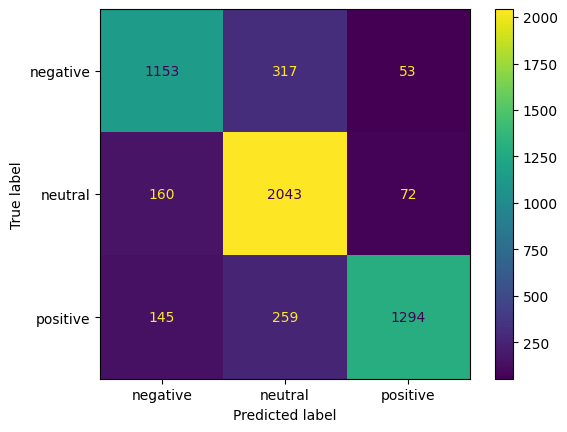

In [ ]:
ConfusionMatrixDisplay.from_predictions(Y_test, pred_rfc)

In [ ]:
print(f'Baseline model:{score_baseline} \nLogistic regression {score_lr}\nDecision Tree Classification {score_dt}\nRandim Forest Classifier {score_rfc}')

Baseline model:0.40454876273653567 
Logistic regression 0.8349708879184862
Decision Tree Classification 0.7634643377001455
Randim Forest Classifier 0.8169577874818049


In [ ]:
def output_lable(n):
    if n == 0:
        return "The Text Sentement is Negative"
    elif n == 1:
        return "The Text Sentement is Neutral"
    elif n == 2:
        return "The Text Sentement is Positive"

def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wp)
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_lr = lr.predict(new_xv_test)
    pred_dt = dt.predict(new_xv_test)
    pred_rfc = rfc.predict(new_xv_test)

    return print((output_lable(pred_lr[1])))

In [ ]:
def wp(text):

    return text.upper()

def manual_testing(news):
    testing_news = {"text": [news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wp)
    new_x_test = new_def_test["text"]

    new_xv_test = vectorization.transform(new_x_test)
    return new_xv_test

text = "I am Sad"
manual_testing(text)

<1x15374 sparse matrix of type '<class 'numpy.float64'>'
	with 2 stored elements in Compressed Sparse Row format>